In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [3]:
df=pd.read_csv('TCS_history.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,8/12/2002,28.794172,29.742206,28.794172,29.519140,212976,0.0,0
1,8/13/2002,29.556316,30.030333,28.905705,29.119476,153576,0.0,0
2,8/14/2002,29.184536,29.184536,26.563503,27.111877,822776,0.0,0
3,8/15/2002,27.111877,27.111877,27.111877,27.111877,0,0.0,0
4,8/16/2002,26.972458,28.255089,26.582090,27.046812,811856,0.0,0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4458,9/24/2021,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0
4459,9/27/2021,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0
4460,9/28/2021,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0
4461,9/29/2021,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0
4462,9/30/2021,3805.000000,3805.000000,3765.000000,3773.199951,640479,0.0,0


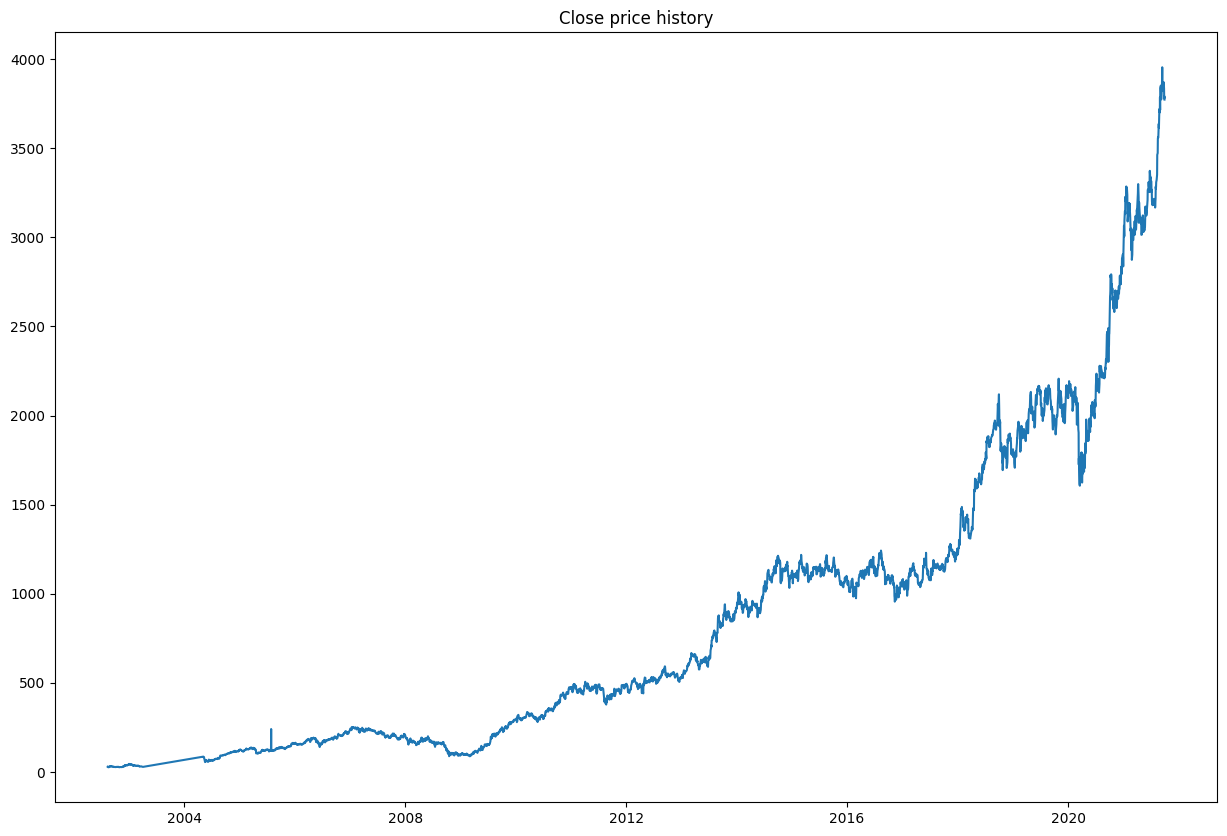

In [5]:
df["Date"]=pd.to_datetime(df.Date,format="mixed")
df.index=df['Date']

plt.figure(figsize=(15,10))
plt.title("Close price history")
plt.plot(df["Close"])

In [6]:
data=df.sort_index(ascending=True,axis=0)

new_dataset=pd.DataFrame(index=range(0,len(df)),columns=["Date",'Close'])

for i in range(len(data)):
    new_dataset["Date"][i]=data["Date"][i]
    new_dataset["Close"][i]=data["Close"][i]
    
new_dataset=new_dataset.dropna()
new_dataset



,Date,Close
0,2002-08-12 00:00:00,29.51914
1,2002-08-13 00:00:00,29.119476
2,2002-08-14 00:00:00,27.111877
3,2002-08-15 00:00:00,27.111877
4,2002-08-16 00:00:00,27.046812
...,...,...
4458,2021-09-24 00:00:00,3871.300049
4459,2021-09-27 00:00:00,3836.949951
4460,2021-09-28 00:00:00,3779.149902
4461,2021-09-29 00:00:00,3791.899902


In [7]:
scaler=MinMaxScaler()

final_dataset=new_dataset.values

train_data=final_dataset[:3100, :3100]
test_data=final_dataset[3100: , 3100:]

In [8]:
scaled_data=scaler.fit_transform(final_dataset[:,1:])
scaled_data

array([[7.99743656e-04],
       [6.98000689e-04],
       [1.86923614e-04],
       ...,
       [9.55348155e-01],
       [9.58593939e-01],
       [9.53833468e-01]])

In [9]:
X_train_data, y_train_data = [], []
for i in range(60,len(train_data)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)
X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))
X_train_data

array([[[7.99743656e-04],
        [6.98000689e-04],
        [1.86923614e-04],
        ...,
        [2.46074075e-04],
        [3.54915875e-04],
        [2.81568721e-04]],

       [[6.98000689e-04],
        [1.86923614e-04],
        [1.86923614e-04],
        ...,
        [3.54915875e-04],
        [2.81568721e-04],
        [3.33620351e-04]],

       [[1.86923614e-04],
        [1.86923614e-04],
        [1.70359835e-04],
        ...,
        [2.81568721e-04],
        [3.33620351e-04],
        [2.57908052e-04]],

       ...,

       [[2.68180266e-01],
        [2.71547089e-01],
        [2.66843828e-01],
        ...,
        [2.62967427e-01],
        [2.61798612e-01],
        [2.58936798e-01]],

       [[2.71547089e-01],
        [2.66843828e-01],
        [2.69204051e-01],
        ...,
        [2.61798612e-01],
        [2.58936798e-01],
        [2.58611871e-01]],

       [[2.66843828e-01],
        [2.69204051e-01],
        [2.70165157e-01],
        ...,
        [2.58936798e-01],
        [2.5861

In [16]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))


inputs_data = new_dataset[len(new_dataset) - len(test_data) - 60:].iloc[:, 1:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.fit_transform(inputs_data)

lstm_model.compile(loss='mean_squared_error', optimizer = 'adam')
lstm_model.fit(X_train_data,y_train_data, epochs=1, batch_size=1, verbose=2)

3040/3040 - 67s - loss: 1.3216e-04 - 67s/epoch - 22ms/step


In [17]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

43/43 [==============================] - 2s 16ms/step


In [18]:
predicted_closing_price

array([[1057.4938],
       [1063.365 ],
       [1071.1478],
       ...,
       [3563.4456],
       [3553.9116],
       [3544.5327]], dtype=float32)

C:\Users\T 480\AppData\Local\Temp\ipykernel_6664\691794722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = predicted_closing_price


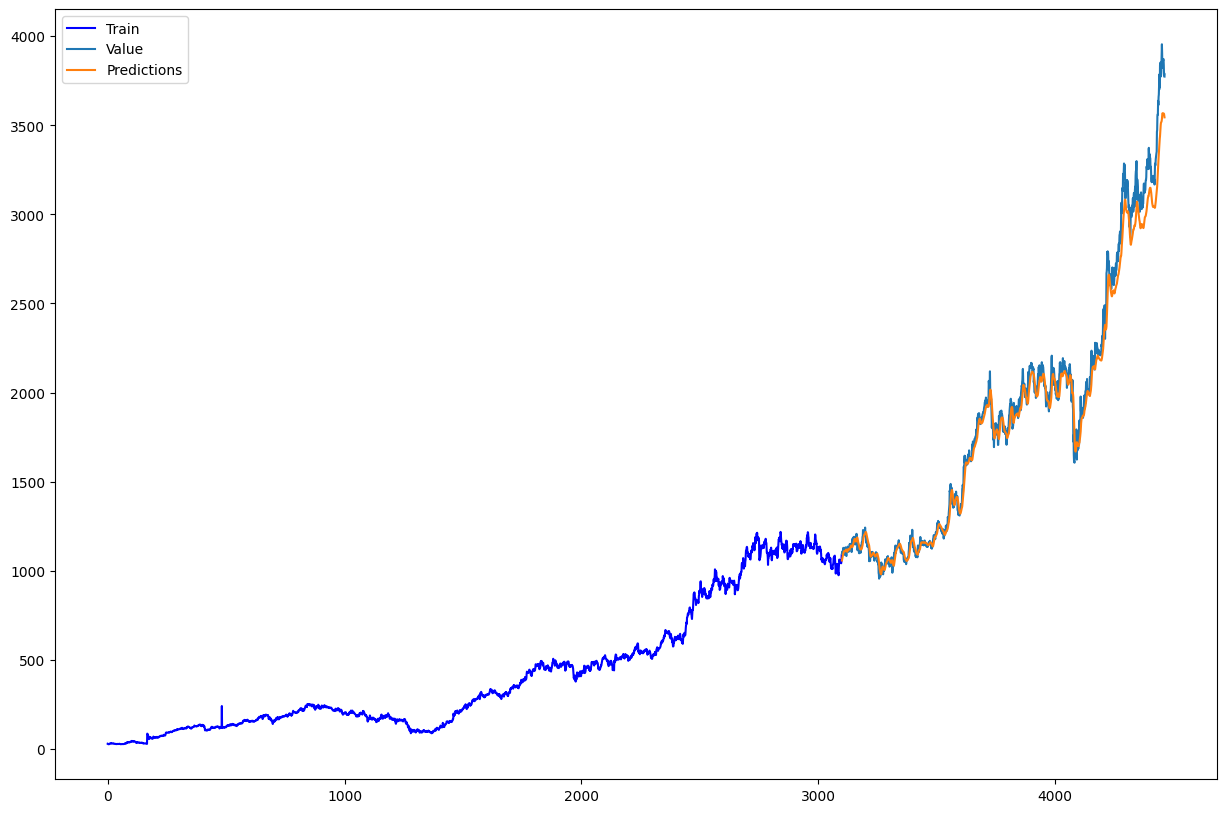

In [19]:
train_data=new_dataset[:3100]
test_data=new_dataset[3100:]
test_data['Predictions'] = predicted_closing_price
plt.figure(figsize=(15,10))
plt.plot(train_data['Close'], color='blue', label = 'Actual Stock Price')
plt.plot(test_data[[ 'Close','Predictions']])
plt.legend(['Train','Value','Predictions'],loc='upper left')
plt.show()